### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Additional

import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [19]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [22]:
# rating data
print('*******************Dataset Info************************')
print(data.info())
print('*******************DataSet Shape***********************')
print(data.shape)
print('*********************Describe**************************')
print(data.describe())
print('*******************Number of nulls*********************')
print(data.isnull().sum())
print('*******************************************************')
data.head()


*******************Dataset Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
*******************DataSet Shape***********************
(100000, 4)
*********************Describe**************************
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
#item  movie
print('*******************Dataset Info*************************')
print(item.info())
print('*******************DataSet Shape************************')
print(item.shape)
print('*********************Describe***************************')
print(item.describe())
print('******************Number of nulls***********************')
print(item.isnull().sum())
print('********************************************************')
item.head()

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
#user
print('*******************Dataset Info*************************')
print(user.info())
print('*******************DataSet Shape************************')
print(user.shape)
print('*********************Describe***************************')
print(user.describe())
print('******************Number of nulls***********************')
print(user.isnull().sum())
print('********************************************************')
user.head()

*******************Dataset Info*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
*******************DataSet Shape************************
(943, 5)
*********************Describe***************************
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
******************Number of nulls***********************
user id       0
age           0
gender        0
occup

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**Observations:**

- `A total of 10,000 different ratings have been recorded from 943 different users for 1681 different movies.`

- `None of the datasets have null values.`

- `'Movie id' is common between data and item`

- `'user id' is common between data and user. These common columns will help us to merge the data files`

- `Range of ratings in 1 to 5`

- `All the genre columns (Action, Western, Sci-Fi, etc.) are binary in nature`

- `People from all age groups are present as minimumn age is 7 and maximum is 73`

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [12]:
item[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [26]:
item.loc[:, 'unknown']

0       0
1       0
2       0
3       0
4       0
       ..
1676    0
1677    0
1678    0
1679    0
1680    0
Name: unknown, Length: 1681, dtype: int64

In [24]:
item.loc[:,'unknown':'Western'].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Insights:**

- `Drama has highest number of movie releases : 725.`

- `Fantasy has the lowest count i.e. 22 if we ignore unknown`

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [27]:
item['unknown'].value_counts()

0    1680
1       1
Name: unknown, dtype: int64

In [32]:
item = item.query('unknown == 0')


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#item = item[item['unknown']!=1]

In [11]:
item['unknown'].value_counts()

0    1680
Name: unknown, dtype: int64

**Insights:**

- `There was only movie that had genre as unknown therefore dropping the column 'unknown' as all the values left are 0`


In [12]:
item.drop('unknown',axis=1,inplace=True)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [13]:
item.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [43]:
item_sub = item.loc[:,('movie id', 'movie title')]

In [44]:
item_sub['num_genres'] = item.loc[:,'Action':'Western'].sum(axis = 1) 
item_sub

,movie id,movie title,num_genres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3
...,...,...,...
1676,1678,Mat' i syn,1
1677,1679,B. Monkey,2
1678,1680,Sliding Doors,2
1679,1681,You So Crazy,1


In [45]:
item_sub.query('num_genres > 1' )

,movie id,movie title,num_genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


In [48]:
# sort
item_sub.query('num_genres > 1' ).sort_values(by = 'num_genres', ascending = False)


,movie id,movie title,num_genres
171,172,"Empire Strikes Back, The",6
558,560,"Kid in King Arthur's Court, A",6
424,426,"Transformers: The Movie, The",6
753,755,Jumanji,5
16,17,From Dusk Till Dawn,5
...,...,...,...
703,705,Singin' in the Rain,2
707,709,Strictly Ballroom,2
710,712,Tin Men,2
712,714,Carrington,2


**Insights:**

- `Highest number of genres for a particular movie is 6`

- `Total 849 movies have more than one genre`

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


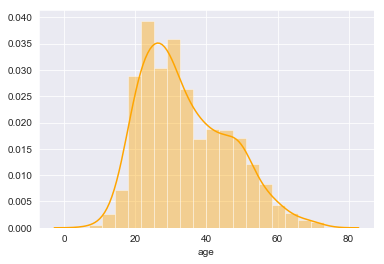

In [19]:
sns.distplot(user['age'],color='orange')
plt.show()

**Insights:**

- `Most of the people are between 20-40 years of age`

In [50]:
item['release date'].head()

0    01-Jan-1995
1    01-Jan-1995
2    01-Jan-1995
3    01-Jan-1995
4    01-Jan-1995
Name: release date, dtype: object

In [54]:
item['release year'] = item['release date'].str[-4:]#.astype('int')

# Alternative way str.split()
# item['release date'] = item['release date'].str.split('-').str[-1].astype('int')

# Alternative way using datetime
# item['release date'] = pd.to_datetime(item['release date']).dt.year

In [53]:
item['release date'].str.split('-').str[-1]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release date, Length: 1681, dtype: object

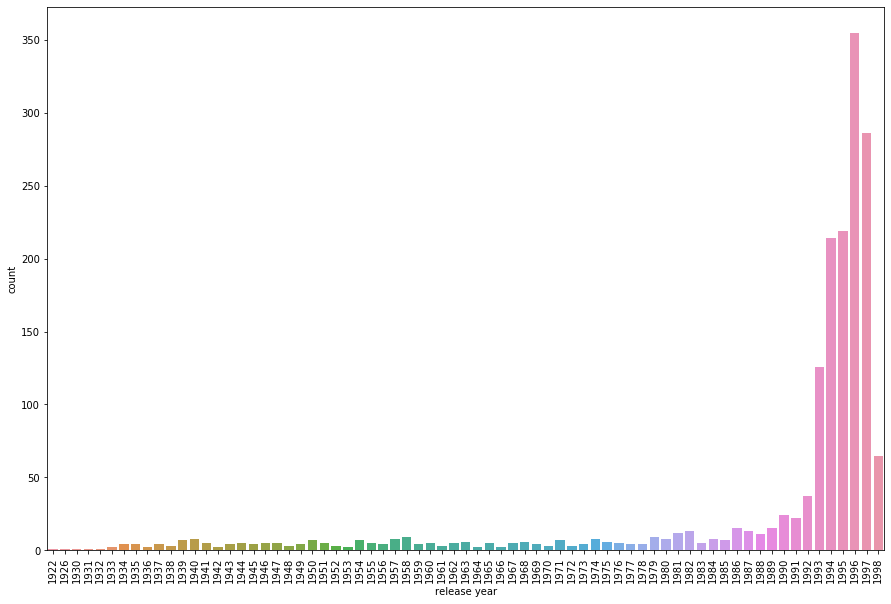

In [55]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(x = item['release year'])
plt.show()
print()


**Insights:**

- `Significant increase in number of movies after 1990 and a sudden drop before 2000 (around 1998)`

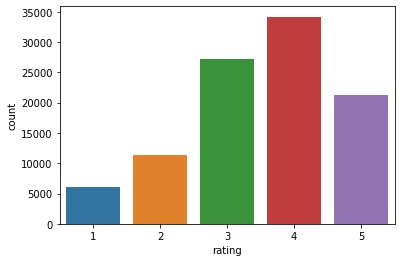

4    34.174
3    27.145
5    21.201
2    11.370
1     6.110
Name: rating, dtype: float64


In [59]:
sns.countplot(x = data['rating'])
plt.show()
ratings = data['rating'].value_counts(normalize=True)
print(ratings*100)

**Insights:**

- `Around 34% of movies are rated as 4 and 6% as 1`

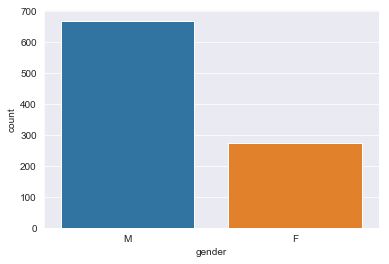

M   71.05
F   28.95
Name: gender, dtype: float64


In [23]:
sns.countplot(user['gender'])
plt.show()

gender_dist = user['gender'].value_counts(normalize = True)
print(gender_dist*100)

**Insights:**

- `Of all the users who rated, ~71% are men and 29% women`

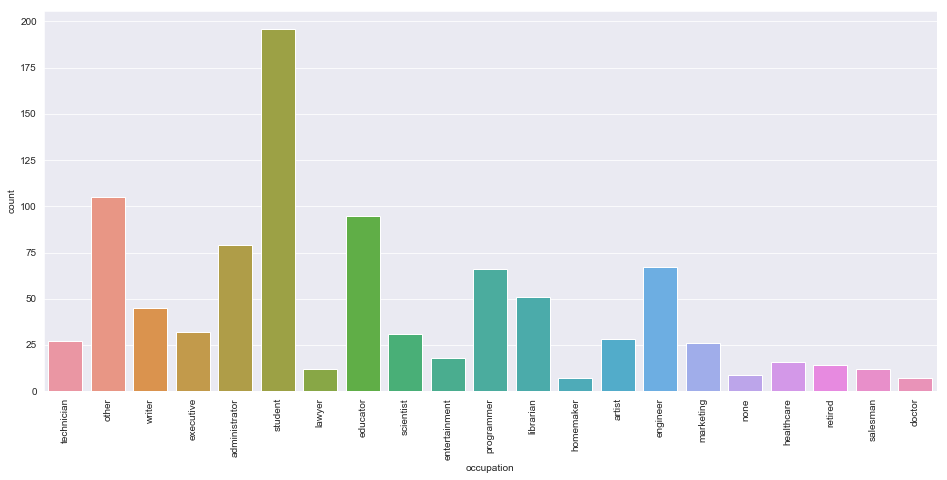

student         20.78
other           11.13
educator        10.07
administrator    8.38
engineer         7.10
programmer       7.00
librarian        5.41
writer           4.77
executive        3.39
scientist        3.29
artist           2.97
technician       2.86
marketing        2.76
entertainment    1.91
healthcare       1.70
retired          1.48
salesman         1.27
lawyer           1.27
none             0.95
homemaker        0.74
doctor           0.74
Name: occupation, dtype: float64


In [24]:
plt.figure(figsize=(16,7))                             # to enlarge figure size
plt.xticks(rotation = 90)
sns.countplot(user['occupation'])
plt.show()

occupation = user['occupation'].value_counts(normalize=True)
print(occupation*100)

**Insights:**

- `Highest percentage of movie rating population is student and least are doctor's and homemaker's`

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [96]:
genre_by_year = item.groupby('release year').sum()
# Group by data based on release year and sum of all the genres to find the number of movies release in a particular in that genre
genre_by_year
genre_by_year = genre_by_year.drop(columns = 'movie id')
# Dropping 'movie id' because it is not required here

# genre_by_year

In [97]:
genre_by_year['Total'] = genre_by_year.sum(axis=1).values
# Calculating total of each year and forming a new column for it

genre_by_year.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
release year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [98]:
# genre_by_year = (genre_by_year.div(genre_by_year['Total'], axis= 0) * 100).T
genre_by_year = (genre_by_year.div(genre_by_year['Total'], axis= 0) * 100).drop('Total',axis=1)

# Diving each row by its total to calculate percentages
# 'Total' column has been dropped
# .T is used to change rows into columns and columns into rows

genre_by_year

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717
1995,0.0,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934
1996,0.0,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782


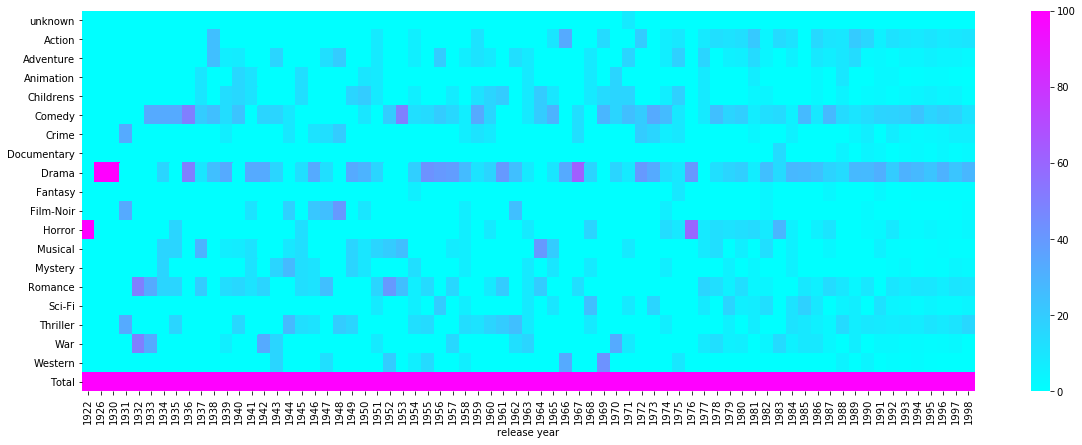

In [84]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='cool')  #heat map to plot the above table
plt.show()

**Insights:**

- `Popularity in drama is very fluctuating with increase in years`

- `Comedy has gained popularity over the years`

- `Western movies gained popularity over some years and then totally vanished`

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [30]:
# Group by data according to movie id and use metric count and mean to get count of ratings and average ratings for every movie.

movie = data.groupby('movie id')['rating'].agg(['count','mean'])

movie.head()

,count,mean
movie id,,
1,452,3.88
2,131,3.21
3,90,3.03
4,209,3.55
5,86,3.30


In [31]:
# Slicing movies have count of ratings more than 100 and storing it in the original 'movie' dataframe. 

movie = movie[movie['count'] > 100]

movie.head()

,count,mean
movie id,,
1,452,3.88
2,131,3.21
4,209,3.55
7,392,3.80
8,219,4.00


In [32]:
# Sorting the dataframe according to the average movie ratings

movie = movie.sort_values(by='mean',ascending=False)

movie.head()

,count,mean
movie id,,
408,112,4.49
318,298,4.47
169,118,4.47
483,243,4.46
64,283,4.45


In [33]:
# Merging with 'item' dataset to get movie titles
# Selecting top 25 movies only

movie.merge(item[['movie id', 'movie title']],on='movie id',how='left').head(25)

,movie id,count,mean,movie title
0,408,112,4.49,"Close Shave, A"
1,318,298,4.47,Schindler's List
2,169,118,4.47,"Wrong Trousers, The"
3,483,243,4.46,Casablanca
4,64,283,4.45,"Shawshank Redemption, The"
5,603,209,4.39,Rear Window
6,12,267,4.39,"Usual Suspects, The"
7,50,583,4.36,Star Wars
8,178,125,4.34,12 Angry Men
9,134,198,4.29,Citizen Kane


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [34]:
# merging on all datasets to get one dataframe

ud  = user.merge(data,on='user id',how='inner')
df = item.merge(ud,on='movie id',how='inner')
df.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,War,Western,release year,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,1,24,M,technician,85711,5,874965758
1,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,2,53,F,other,94043,4,888550871
2,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,5,33,F,other,15213,4,875635748
3,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,6,42,M,executive,98101,4,883599478
4,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,10,53,M,lawyer,90703,4,877888877


In [35]:
Genre_by_gender = df.groupby('gender').sum().loc[:,'Action':'Western'] 
#Group by gender and aggregate with sum and select all the genre columns 

In [36]:
Genre_by_gender['total'] = df['gender'].value_counts()  #Row total of the dataframe

In [37]:
Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74252


In [38]:
Genre_by_gender = Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100 
#dividing each cell with row total and multiplying by 100

Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,21.14,12.20,3.87,8.67,31.35,6.97,0.73,42.77,1.41,1.50,4.65,5.60,5.11,22.76,10.21,19.76,8.50,1.44,100.00
M,27.13,14.29,3.52,6.67,29.31,8.43,0.77,38.90,1.33,1.82,5.55,4.73,5.29,18.32,13.60,22.61,9.71,2.00,100.00


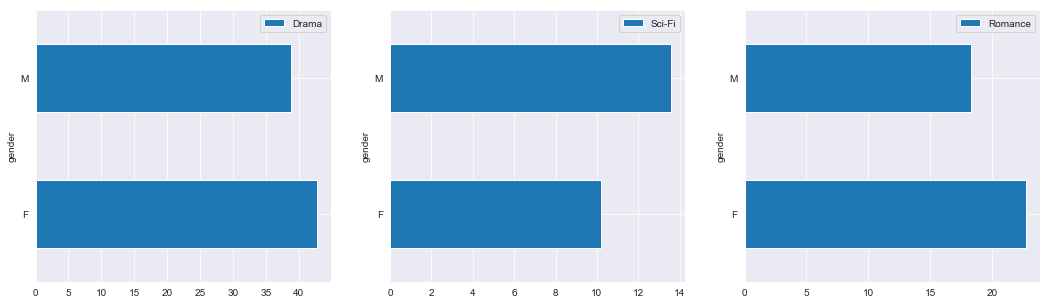

In [39]:
# Additional

# Plotting results for Drama, Sci-Fi and Romance

fig, ax = plt.subplots(ncols = 3, figsize = (18, 5))             
# Using subplots with 3 columns so that all figure are plotting in one row 

Genre_by_gender['Drama'].plot(kind='barh',label='Drama',ax=ax[0])
ax[0].legend()
# legend is used to get the labels, ax is to detemine the position of the plot
# 'barh' is for thr horizontal bar plot

Genre_by_gender['Sci-Fi'].plot(kind='barh',label='Sci-Fi',ax=ax[1])
ax[1].legend()

Genre_by_gender['Romance'].plot(kind='barh',label='Romance',ax=ax[2])
ax[2].legend()

plt.show()

**Conclusion:**
    
* `Of all the ratings given by women 43% were for Drama movies and for Men it was 39%. Therefore the statement is false. Women watch more Drama`


* `Of all the ratings given by women 10% were for Sci-FI movies and for Men it was 14%. Therefore the statement is false. Men watch more Sci-Fi`


* `Of all the ratings given by women 23% were for Drama movies and for Men it was 18%. Therefore the statement is false. Women watch more Romance`

##### ` Answer: All the statements were false.`